In [ ]:
# from sympy import *
import numpy as np
import scipy.io as io
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.pyplot import plot, ion, show, xlim, ylim, title
import scipy.optimize as op 
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

In [2]:
z,m,dm = np.loadtxt("Pantheon.txt", skiprows=1, usecols=(1,4,5), unpack=True)

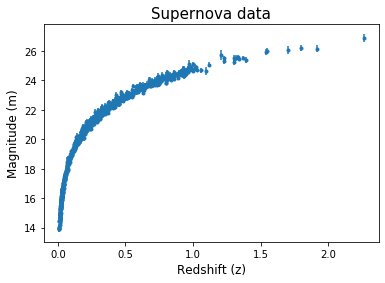

<Figure size 432x288 with 0 Axes>

In [3]:
plt.figure()
plt.errorbar(z,m,yerr=dm,fmt='.')
plt.title("Supernova data",fontsize = 15)
plt.xlabel("Redshift (z)",fontsize = 12)
plt.ylabel("Magnitude (m)",fontsize = 12)
plt.legend
plt.show()
plt.savefig('Datos Supernova.png',dpi=800)

In [4]:
H0=1
def u(x,omegaM,w):
    return 1/(np.sqrt(omegaM*(1+x)**3+(1-omegaM)*(1+x)**(3*(1+w))))
    

In [5]:
def v(z,omegaM,w):
    return quad(lambda x: u(x,omegaM,w),0,z) [0]

In [6]:
 #vectorizamos la función
vv=np.vectorize(v,excluded=[1,2])


In [7]:
vv(z,0.3,-1);

In [53]:
vv(z,1,0);

In [8]:
def dl(z,omegaM,w):
    return (1+z)*H0*vv(z,omegaM,w)

In [9]:
point2=dl(0.5,0.3,-1)
point2

0.661476502430917

In [10]:
#Ver pag 189 de Theoretical astrophysics vol 3 galaxies and cosmology

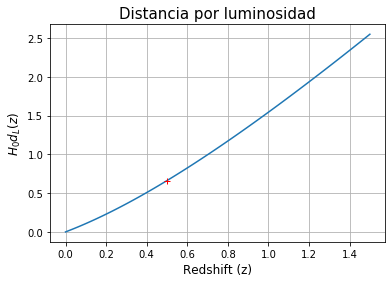

In [11]:
N=100
x=np.linspace(0,1.5,N)
dl2=dl(x,0.3,-1)
plot(x,dl2)
plt.title("Distancia por luminosidad",fontsize = 15)
plt.xlabel("Redshift (z)",fontsize = 12)
plt.ylabel("$H_0 d_L(z)$",fontsize=12)
plot(0.5,point2,'+',color="red")
plt.grid()
plt.savefig('Distancia por LuminosidadLCDM.png',dpi=700)

In [12]:
def muth(z,omegaM,w,M):   #Definimos el módulo de distancia
    return 5*np.log10(dl(z,omegaM,w))+M

In [15]:
#Definimos el parametro Mm que minimiza chi2
def M(z,m,dm,omegaM,w):
    A = 1/np.sum(1/dm**2)
    B = np.sum((m-5*np.log10(dl(z,omegaM,w)))/dm**2) 
    return B*A

In [16]:
Mm = M(z,m,dm,0.3,-1)
Mm

23.81006888928646

In [23]:
M3=M(z,m,dm,1,0)
M3

24.043355901371534

In [24]:
M_3a=M(z,m,dm,1,-1)
M_3a

24.043355901371534

In [25]:
#Definimos función chi2minim para w
def chi2_3(omegaM,w):
    return  np.sum((((m-muth(z,omegaM,w,M3))**2)/dm**2))

In [26]:


#Definimos función chi2minim
def chi2(omegaM,w):
    return  np.sum((((m-muth(z,omegaM,w,Mm))**2)/dm**2))

In [27]:
chi2_3(1,0)

2482.6643239481155

In [28]:
chi2_3(1,-1)

2482.6643239481155

In [19]:
chi2(0.3,-1)

1037.1784427811267

In [30]:
def chi2oM(omegaM):   #Creamos la funcion Chi2 en función unicamente de la densidad de materia, fijando w=-1.
        w = -1  
        chi2oM = np.sum((((m-muth(z,omegaM,w,Mm))**2)/dm**2))
        return chi2oM

In [31]:
def chi2w(w):
    omegaM=1

In [32]:
#Valor de omegaM y de Chi2 que mejor ajusta a los datos en el modelo LambdaCDM.
chi2oM_min=op.minimize(chi2oM,0,method='TNC', tol=1e-5) #funcion que minimiza \chi2 
chi2oM_min = (chi2oM_min.x,chi2oM_min.fun)                 
chi2oM_min

(array([0.29420486]), 1036.6217359294324)

In [33]:
j = np.linspace(0,1,500)
chi2om = np.zeros(len(j))

In [34]:
for i in range(len(j)):
    chi2om[i] = chi2(j[i],-1)
chi2om;

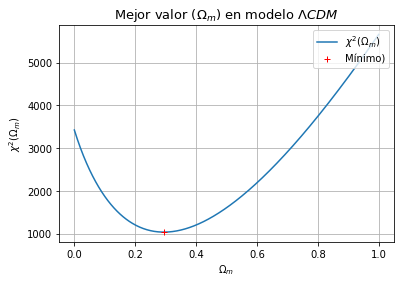

In [35]:
plot(j,chi2om, label=('$\chi^2(\Omega_m)$'))
plot(chi2oM_min[0],chi2oM_min[1],"+", color="red",label=('Mínimo)'))
plt.grid()
plt.legend(loc="upper right") 
title("Mejor valor $(\Omega_m)$ en modelo $\Lambda CDM$", fontsize=13)
plt.xlabel( "$\Omega_m$", fontsize = 10, color="black")
plt.ylabel("$\chi^2(\Omega_m)$", fontsize = 10, color="black")
plt.savefig('Minimizacion Chi2(Om).png',dpi=1200)

In [36]:
#Para calcular el valor de 1\sigma, definimos la variable \delta\chi^2
sigma1=1

In [37]:
deltachi=np.array([chi2oM_min[1]+sigma1,chi2oM_min[1]-sigma1])
deltachi

array([1037.62173593, 1035.62173593])

In [38]:
#Ahora calculamos el valor de omegaM a ese sigma


In [39]:
#Vamos a la función de interpolación, para, una vez sabemos el valor de y, obtener el valor en x
#Creamos la función
intr=interp1d(chi2om,j)

#Evaluamos para 1sigma por la izquierda
onesig=intr(1037.62173593)
onesig

array(0.28820812)

In [40]:
#Ahora por la dcha, veamos cuál es error
deltaom=(chi2oM_min[0]-onesig)
deltaom

array([0.00599673])

In [41]:
#Evaluamos para 1sigma por la izda
onesig_izda=(chi2oM_min[0]+deltaom)
onesig_izda

array([0.30020159])

In [42]:
##MODELO Einstein-de Sitter:
chi2_point2 =chi2(1,-1)
chi2_point2

5656.865753977382

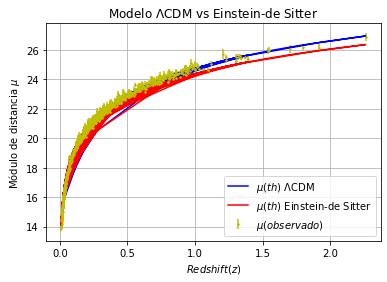

In [47]:
#Representamos el modulo de distancias para ambos modelos (LambdaCDM y E-dS) mas datos:

plt.figure()
title("Modelo $\Lambda$CDM vs Einstein-de Sitter", fontsize=12)
plt.xlabel( "$Redshift (z)$", fontsize = 10, color="black")
plt.ylabel("Módulo de distancia $\mu$", fontsize = 10, color="black")
plot(z,muth(z,chi2oM_min[0],-1,Mm),'-', color="b",label=('$\mu(th)$ $\Lambda$CDM'))
plot(z,muth(z,1,0,M3),'-', color="red", label=('$\mu(th)$ Einstein-de Sitter'))
plt.errorbar(z,m, yerr=dm, fmt='.', ms=3, label=('$\mu(observado)$ '), alpha=1,color='y')
plt.grid()
plt.legend(loc="lower right") 
plt.savefig('Modulo de distancia LCDM vs E-dS.png', dpi=700)

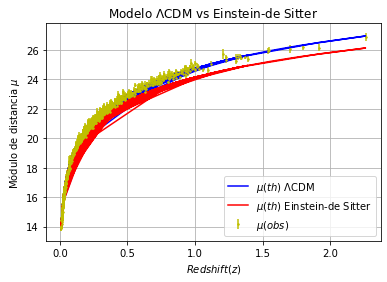

In [44]:
#Representamos el modulo de distancias para ambos modelos (LambdaCDM y E-dS) mas datos:

plt.figure()
title("Modelo $\Lambda$CDM vs Einstein-de Sitter", fontsize=12)
plt.xlabel( "$Redshift (z)$", fontsize = 10, color="black")
plt.ylabel("Módulo de distancia $\mu$", fontsize = 10, color="black")
plot(z,muth(z,chi2oM_min[0],-1,Mm),'-', color="b",label=('$\mu(th)$ $\Lambda$CDM'))
plot(z,muth(z,1,-1,Mm),'-', color="red", label=('$\mu(th)$ Einstein-de Sitter'))
plt.errorbar(z,m, yerr=dm, fmt='.', ms=3, label=('$\mu(obs)$ '), alpha=1,color='y')
plt.grid()
plt.legend(loc="lower right") 
plt.savefig('M-distancia LCDM vs E-dS.png', dpi=1200)

In [45]:
#¿Cuantas sigmas separan ambos modelos?
#Sabemos que el incremento de Chi^2(\sigma_z) es igual a z^2.

sigmas = np.sqrt((chi2_3(1,0) -543)- (chi2oM_min[1]-543))
sigmas

38.02686666054256

In [80]:
#¿Cuantas sigmas separan ambos modelos?
#Sabemos que el incremento de Chi^2(\sigma_z) es igual a z^2.

sigmas = np.sqrt((chi2_point2 -543)- (chi2oM_min[1]-543))
sigmas

67.97237687508029

In [49]:
#8: Calcular dL de una Supernova a z=1 para el mejor ajuste LambdaCDM y el distancia comovil.
#a)
H0inv=4285.0 #Mpc

Supernova = H0inv*dl(1, chi2oM_min[0], -1) #Mpc
Supernova



6634.017785987539

In [50]:
chi2oM_min[0]

array([0.29420486])

In [54]:
#La distancia a la misma supernova con el modelo Einstein-de Sitter hubiera sido:
Supernova2 = H0inv*dl(1, 1, 0) #Mpc
Supernova2

5020.189770462575

In [40]:
Supernova/2

3317.0088929937697

In [55]:
Supernova2/2

2510.0948852312877

In [41]:
g=[0.3,-0.9]

In [42]:
#Ejercicio 9


In [43]:
#Vamos a usar el método de meter todas las variables como un vector 
def chi2par(params):
    omegaM,w=params
    print(params)
    
    return np.sum((((m-muth(z,omegaM,w,Mm))**2)/dm**2))

In [44]:
chi2min3=op.minimize(chi2par,g,method='TNC',tol=1e-7);

chi2min3 = (chi2min3.x,chi2min3.fun) 
chi2min3

[ 0.3 -0.9]
[ 0.3 -0.9]
[ 0.30000001 -0.9       ]
[ 0.3        -0.89999999]
[ 0.29999998 -0.90000002]
[ 0.29999998 -0.90000002]
[ 0.29999999 -0.90000002]
[ 0.29999998 -0.90000001]
[ 0.25066885 -0.9557771 ]
[ 0.25066885 -0.9557771 ]
[ 0.25066886 -0.9557771 ]
[ 0.25066885 -0.95577709]
[ 0.27533442 -0.92788855]
[ 0.27533442 -0.92788855]
[ 0.27533443 -0.92788855]
[ 0.27533442 -0.92788854]
[ 0.26300164 -0.94183283]
[ 0.26300164 -0.94183283]
[ 0.26300165 -0.94183283]
[ 0.26300164 -0.94183282]
[ 0.26300164 -0.94183283]
[ 0.26300164 -0.94183283]
[ 0.26300165 -0.94183283]
[ 0.26300164 -0.94183282]
[ 0.26758014 -0.94260845]
[ 0.26758014 -0.94260845]
[ 0.26758015 -0.94260845]
[ 0.26758014 -0.94260844]
[ 0.26758014 -0.94260847]
[ 0.26758014 -0.94260847]
[ 0.26758015 -0.94260847]
[ 0.26758014 -0.94260846]
[ 0.26849598 -0.95199232]
[ 0.26849598 -0.95199232]
[ 0.26849599 -0.95199232]
[ 0.26849598 -0.95199231]
[ 0.26803806 -0.94730038]
[ 0.26803806 -0.94730038]
[ 0.26803807 -0.94730038]
[ 0.26803806 -

(array([ 0.31013274, -1.03781951]), 1036.4214771699112)

In [45]:
#Ejercicio 9:
#Ahora tenemos 2 parámetros libres, omegaM y w
#La sigma también cambia, pues es [2.30,6.18,11.83]

chi2min3[1]

1036.4214771699112

In [46]:
N=100
om = np.linspace(0.1,0.5,N)
w = np.linspace(-2, -0.6, N)


In [47]:
sigma2=[2.30,6.18,11.83]


In [48]:
#Esta es mi matriz que contiene los errores a 1,2 y 3 sigmas; columna 1 1 sigma, col2 2 sig, col 3 3 sig
deltachi2_point3=([sigma2[0]+chi2min3[1],abs(sigma2[0]-chi2min3[1])],[sigma2[1]+chi2min3[1],abs(sigma2[1]-chi2min3[1])],[sigma2[2]+chi2min3[1],abs(sigma2[2]-chi2min3[1])])
deltachi2_point3

([1038.7214771699112, 1034.1214771699113],
 [1042.6014771699113, 1030.2414771699111],
 [1048.2514771699111, 1024.5914771699113])

In [49]:
Z = np.zeros((np.size(om),np.size(w)))

In [55]:
for i in range(np.size(om)):
    for j in range(np.size(w)):
        Z[j,i] = np.sum((((m-muth(z,om[i],w[j],Mv(z,m,dm,om[i],w[j])))**2)/dm**2))

In [56]:
a=np.min(Z)
a

1032.4622449268522

In [57]:
idx=np.argmin(Z)
idx

5462

In [58]:
rt = np.unravel_index(idx,Z.shape)
rt

(54, 62)

In [59]:
w[54]

-1.2363636363636363

In [60]:
om[62]

0.35050505050505054

In [61]:
xx,yy=np.meshgrid(om,w)

In [62]:
levels = sigma2+a

In [63]:
%matplotlib notebook

<IPython.core.display.Javascript object>


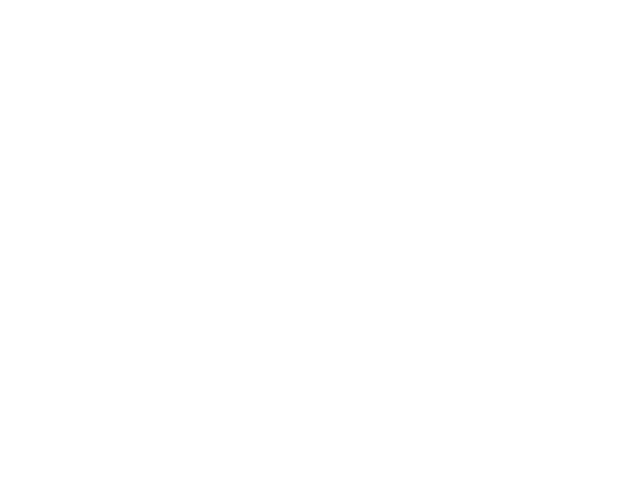

No handles with labels found to put in legend.


In [64]:
plt.contour(xx,yy,Z,levels,colors='k') # draw the contours
plt.contourf(xx,yy,Z,levels) # draw the colours
plt.xlabel("$\Omega_M$", fontsize=15)
plt.ylabel("$\omega$", fontsize=15)
plt.title("$(\Omega_M,\omega)$", fontsize=20)
plt.legend(loc="lower right") 
plt.savefig('Contour Plot wcdm 2.png', dpi=700)
plt.show()

In [69]:
   %matplotlib inline

In [ ]:
#Errores a 1 sigma w=-1.035,-1.448    om=0.333, 0.362

In [ ]:
#Vamos a repetir algunas cosas
def M(z,m,dm,omegaM,w):
    A = 1/np.sum(1/dm**2)
    B = np.sum((m-5*np.log10(dl(z,omegaM,w)))/dm**2) 
    return B*A

In [51]:
Mv=np.vectorize(M,excluded=[0,1,2])

In [52]:
Mvwcdn=Mv(z,m,dm,om,w)
Mvwcdn

array([23.42276862, 23.43195804, 23.44098096, 23.44984436, 23.45855472,
       23.46711805, 23.47553995, 23.48382564, 23.49198   , 23.50000761,
       23.50791276, 23.5156995 , 23.52337161, 23.53093269, 23.53838613,
       23.54573512, 23.5529827 , 23.56013175, 23.56718499, 23.57414501,
       23.58101429, 23.58779517, 23.5944899 , 23.6011006 , 23.60762932,
       23.61407801, 23.62044853, 23.62674266, 23.63296212, 23.63910854,
       23.64518349, 23.65118847, 23.65712494, 23.66299429, 23.66879785,
       23.67453691, 23.6802127 , 23.68582641, 23.6913792 , 23.69687217,
       23.70230638, 23.70768287, 23.71300262, 23.71826659, 23.72347571,
       23.72863087, 23.73373294, 23.73878273, 23.74378107, 23.74872874,
       23.75362647, 23.75847502, 23.76327507, 23.76802732, 23.77273243,
       23.77739103, 23.78200375, 23.78657119, 23.79109393, 23.79557253,
       23.80000755, 23.80439951, 23.80874892, 23.81305629, 23.81732209,
       23.82154679, 23.82573085, 23.8298747 , 23.83397878, 23.83

In [53]:
np.min(Mvwcdn)

23.422768616472382

In [54]:
Mm3=Mvwcdn.argmin()
Mm3

0